Overview This project uses data collected from a Minecraft research server hosted by a UBC research group. The dataset is divided into two files:

1. sessions.csv
2. players.csv


In [10]:
library(repr)
library(tidyverse)
library(tidymodels)
sessions <- read_csv("sessions.csv")
players <- read_csv("players.csv")
sessions |>
head(5)
players |>
head(5)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21


Data Summary :

1. sessions.csv: It contains columns with hashed emails of users, session start time and session end time in 2 different formats.
2. players.csv: It contains columns with player exprience, newsletter subscription status , hashed emails of users, total played hours, name, gender and the player's age.

Potential Issues:

1. The data was collected through gameplay log and it may miss the time the player was offline and still add it in total hours played.
2. There could be missing values in the data columns which need to be kept in mind.

Broad Question :-

What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

Specific Question :-

Can a player’s total playtime, number of sessions, and average session length predict whether they subscribe to the newsletter?

Understanding the characteristics and playing style of the players who have subscribed for the new letter will help design recruitment strategies and understanding engagement. Players who are generally more active and consistent are probably more interested in things beyond the game.

Now lets visualize the data in different ways to analyze the data in more depth.

Warning message:
“Removed 19 rows containing non-finite outside the scale range (`stat_count()`).”


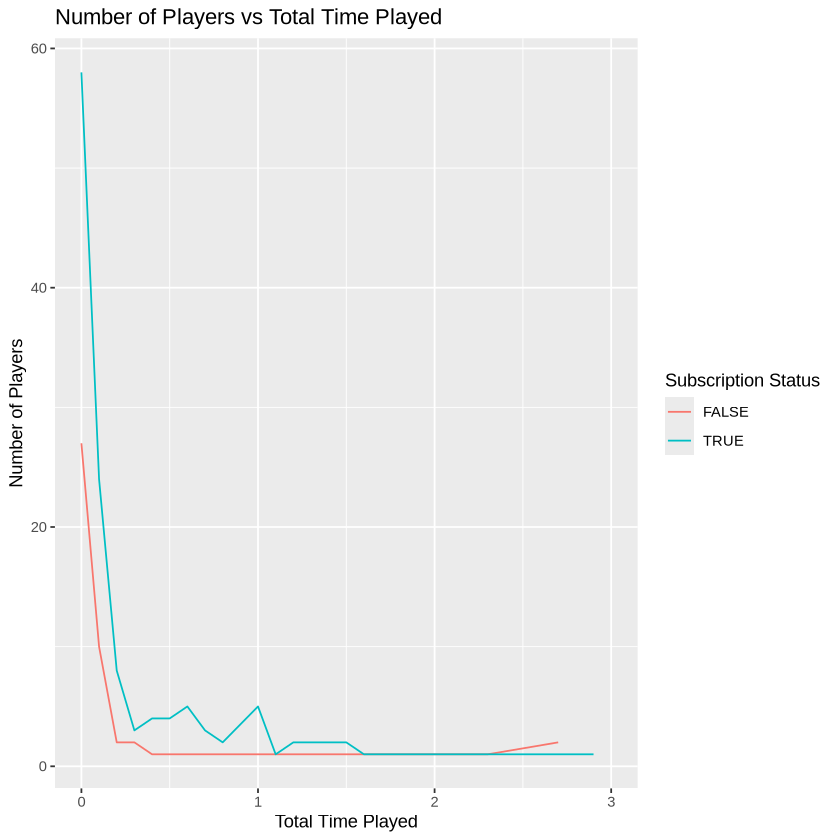

In [3]:
time_players_plot <- ggplot(players,aes(x=played_hours,color=as_factor(subscribe)))+
geom_line(stat="count")+xlim(c(0,3))+
labs(title="Number of Players vs Total Time Played",color="Subscription Status"
     ,x="Total Time Played" , y="Number of Players")
time_players_plot

Now we will analyze the average playtime of users.

In [15]:
players |>
group_by(gender) |>
  summarise(mean_playing_time=mean(played_hours),na.rm = TRUE)

gender,mean_playing_time,na.rm
<chr>,<dbl>,<lgl>
Agender,6.25000000,TRUE
Female,10.63513514,TRUE
Male,4.12741935,TRUE
Non-binary,14.88000000,TRUE
Other,0.20000000,TRUE
Prefer not to say,0.37272727,TRUE
Two-Spirited,0.08333333,TRUE


The above data clearly depicts that the players who subscribes for the newletter we more active and had an overall higher total 
playing time. The data also show regardless the subscription status most players have short platime. This trend also suggests that 
subscription is linked to engagemenet with the game. It also shows the high differences in the playing time of few people which 
leads to the value of mean played time to increase significantly.

Proposed Method
K-Nearest Neighbors (KNN) Classification

It is the suitable method for this data because we need to predict whether a player is going to subscribe for the game's newsletter or not because it makes predictions based on similarity between observations which is perfect for behavioural data where players with similar gaming activity will have similar inclincation towards getting a newsletter subscription.

The assumptions taken into account for this method is that the data is scaled properly and each variable contributes equally to the prediction and the selected K value is appropriate for both recall and precision of the function.

Limitation of this method :- 
1. In case of a large data set it would take a lot of time to complete the prediction.
2. It does not explain why a certain player is classified as subscribed or not.

Model Selection :-

1. The dataset will be split into training (80%) and testing (20%) sets.
2. 5-fold cross-validation will be used on the training data to tune k.
3. Models will be compared based on accuracy.
4. The optimal k value will be chosen to maximize performance on validation data.
5. Final performance will be reported on the test set.
